In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition
from sklearn.cluster import DBSCAN

In [2]:
# Importing DataSet
young = pd.read_csv('data/asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@responses.csv')

In [3]:
# Checking number of NaN records
young.isna().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [4]:
# Due to the small amount of NaN i dropped them
young.dropna(inplace=True)

In [5]:
# Checking unique values of this specific column
young['Smoking'].unique()

array(['never smoked', 'tried smoking', 'current smoker', 'former smoker'],
      dtype=object)

In [6]:
# function to categorize the Smoke column
def cat_smoke(x):
    """
    Function to categorize the types of smokers
    
    """
    if (x == 'never smoked'):
        return '1'
    elif (x == 'tried smoking'):
        return '2'
    elif (x == 'former smoker'):
        return '3'
    elif (x == 'current smoker'):
        return '4'

In [7]:
# Executing function and adding a smoke_group column to the DataSet
young['smoke_group'] = young['Smoking'].apply(cat_smoke)

In [8]:
# Dropping the original Smoke column
young.drop('Smoking', axis=1, inplace=True)

In [9]:
# Checking unique values of this specific column
young['Alcohol'].unique()

array(['drink a lot', 'social drinker', 'never'], dtype=object)

In [10]:
# Function to categorize the Alcohol column
def cat_alcohol(x):
    """
    Function to categorize alcohol consumption
    
    """
    if (x == 'never'):
        return '1'
    elif (x == 'social drinker'):
        return '2'
    elif (x == 'drink a lot'):
        return '3'

In [11]:
# Executing function and adding a acohol_group column to the DataSet
young['alcohol_group'] = young['Alcohol'].apply(cat_alcohol)

In [12]:
# Dropping the original Alcohol column
young.drop('Alcohol', axis=1, inplace=True)

In [13]:
# Checking unique values of this specific column
young['Punctuality'].unique()

array(['i am always on time', 'i am often early',
       'i am often running late'], dtype=object)

In [14]:
# function to categorize the Punctuality column
def cat_punct(x):
    """
    Function to categorize punctuality
    
    """
    if (x == 'i am often early'):
        return '1'
    elif (x == 'i am always on time'):
        return '2'
    elif (x == 'i am often running late'):
        return '3'

In [15]:
# Executing function and adding a punctuality_group column to the DataSet
young['punctuality_group'] = young['Punctuality'].apply(cat_punct)

In [16]:
# Dropping the original Punctuality column
young.drop('Punctuality', axis=1, inplace=True)

In [17]:
# Dropping a few columns i thought to be insignificant to the data
young.drop(['Only child', 'Village - town', 'House - block of flats', 'Left - right handed', 'Lying'], axis=1, inplace=True)

In [18]:
# Checking unique values of this specific column
young['Education'].unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil'], dtype=object)

In [19]:
# function to categorize the Education column
def cat_edu(x):
    """
    Function to categorize degree of education
    
    """
    if (x == 'currently a primary school pupil'):
        return '1'
    elif (x == 'primary school'):
        return '2'
    elif (x == 'secondary school'):
        return '3'
    elif (x == 'college/bachelor degree'):
        return '4'
    elif (x == 'masters degree'):
        return '5'
    elif (x == 'doctorate degree'):
        return '6'

In [20]:
# Executing function and adding a education_group column to the DataSet
young['education_group'] = young['Education'].apply(cat_edu)

In [21]:
# Dropping the original Education column
young.drop(['Education'], axis=1, inplace=True)

In [22]:
# Selecting the object type columns
young.select_dtypes('object').columns

Index(['Internet usage', 'Gender', 'smoke_group', 'alcohol_group',
       'punctuality_group', 'education_group'],
      dtype='object')

In [23]:
# Checking unique values of this specific column
young['Internet usage'].unique()

array(['few hours a day', 'less than an hour a day', 'most of the day'],
      dtype=object)

In [24]:
# function to categorize the Internet Usage column
def cat_internet(x):
    """
    Function to categorize internet usage
    
    """
    if (x == 'less than an hour a day'):
        return '1'
    elif (x == 'few hours a day'):
        return '2'
    elif (x == 'most of the day'):
        return '3'

In [25]:
# Executing function and adding a internet_group column to the DataSet
young['internet_group'] = young['Internet usage'].apply(cat_internet)

In [26]:
# Dropping the original Internet Usage column
young.drop(['Internet usage'], axis=1, inplace=True)

In [27]:
# Checking unique values of this specific column
young['Gender'].unique()

array(['female', 'male'], dtype=object)

In [28]:
# function to categorize the Gender column
def cat_gender(x):
    """
    Function to categorize gender
    
    """
    if (x == 'male'):
        return '0'
    elif (x == 'female'):
        return '1'

In [29]:
# Executing function and adding a gender_group column to the DataSet
young['gender_group'] = young['Gender'].apply(cat_gender)

In [30]:
# Dropping the original Gender column
young.drop(['Gender'], axis=1, inplace=True)

In [72]:
# Standarizing the DataSet
young_scale = StandardScaler().fit_transform(young)

C:\Users\LIBRE\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LIBRE\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
# Checking the inertia for the kmeans, to help define the optimal number of clusters for this DataSet
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(young_scale)
    print(kmeans.inertia_)

98404.0
93493.01245983492
90994.2061926609
88730.80146031488
87677.07981154995
86764.3386473783
86008.2493038219
85489.44726431342
84856.37241546558


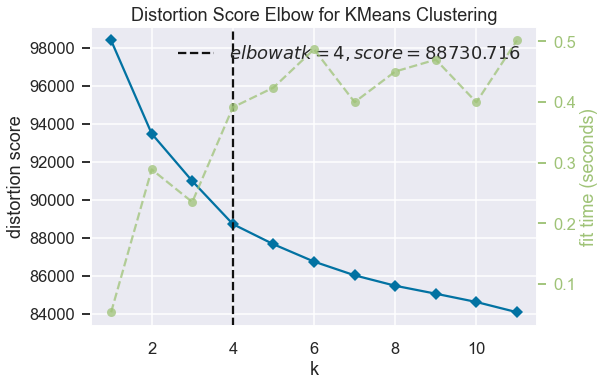

In [74]:
# Utilizing the Elbow Visualizer to confirm the resuts above and 
# help define the optimal number os clusters for hits DataSet
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(young_scale) 
visualizer.show() 

In [75]:
# Running kmeans with the number of clusters we got from the tests above
kmeans = KMeans(4)
kmeans.fit(young_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
# checking kmeans labels
kmeans.labels_

array([1, 0, 3, 3, 2, 1, 0, 1, 1, 3, 3, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 3, 1, 2, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2,
       3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 3, 2,
       2, 3, 3, 1, 3, 0, 0, 0, 0, 3, 1, 0, 2, 3, 2, 3, 0, 2, 3, 3, 1, 3,
       3, 3, 3, 2, 0, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 3, 2, 2, 1, 3, 3, 2,
       2, 0, 2, 0, 3, 3, 0, 1, 0, 3, 0, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 1,
       3, 1, 3, 3, 3, 1, 3, 0, 0, 1, 0, 0, 1, 3, 3, 2, 3, 1, 1, 2, 2, 3,
       0, 3, 0, 2, 2, 3, 1, 0, 2, 3, 3, 0, 1, 3, 3, 3, 2, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 3, 0, 1, 1, 0, 3, 1, 1, 1, 1, 2, 1, 3, 0, 3, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 3, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 3, 1, 2, 0, 2, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 0, 3, 1, 3, 2, 3,
       0, 3, 3, 0, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 1, 2, 3, 0, 0, 1, 2,
       0, 1, 2, 2, 1, 3, 0, 2, 0, 1, 1, 1, 2, 3, 1, 0, 0, 0, 2, 0, 0, 3,
       3, 1, 1, 3, 1, 0, 1, 3, 0, 1, 1, 0, 1, 3, 3,

In [77]:
# Generating the kmeans predict
predicted = kmeans.predict(young_scale)

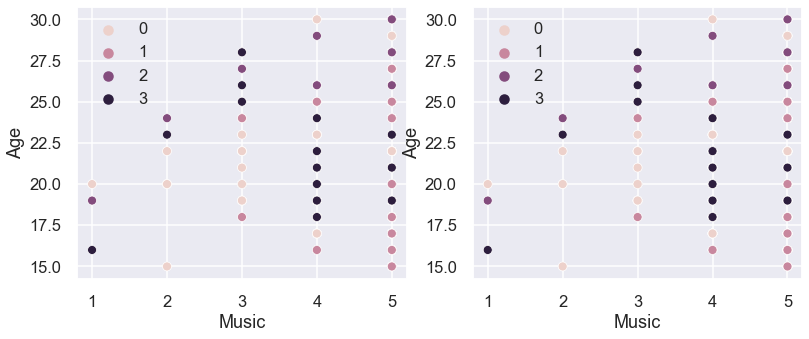

In [78]:
# Plotting scatter plots to test for Music by Age
fig, ax = plt.subplots(1, 2, figsize=(13,5))
sns.set_context("talk")
sns.scatterplot(young['Music'], young['Age'], hue=kmeans.labels_, ax=ax[0])
sns.scatterplot(young['Music'], young['Age'], hue=predicted, ax=ax[1])
sns.set_style('darkgrid')

In [79]:
# Training the model for PCA
pca = PCA(2)
pca.fit(young_scale)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
# Storing the resulting columns in separate variables
pc1 = pca.transform(young_scale)[:, 0]
pc2 = pca.transform(young_scale)[:, 1]

In [81]:
# concatenating the pca results with its respective columns from the original DataSet
coord = sorted(list(zip(pca.components_[0],pca.components_[1], young.columns)), key = lambda x: x[0])
coord

[(-0.24765520986371423, -0.051909143627619, 'gender_group'),
 (-0.20588740543407666, -0.06059286723791367, 'Life struggles'),
 (-0.1801073107404234, 0.021544601700315632, 'Romantic'),
 (-0.15531629545790154, 0.014789703147311992, 'Shopping'),
 (-0.14355019082839693, 0.11794371928696779, 'Theatre'),
 (-0.1417035104253016, 0.05641402091192441, 'Fantasy/Fairy tales'),
 (-0.14069289836813026, 0.11455516209219911, 'Dancing'),
 (-0.13788898480545853, -0.035178172463714824, 'Storm'),
 (-0.1367663391559387, -0.044830220346358224, 'Darkness'),
 (-0.13572397849884177, 0.07300479167521523, 'Writing notes'),
 (-0.1345115020047421, 0.06321618900938399, 'Reading'),
 (-0.12851417278762242, 0.11171176176702478, 'Musical'),
 (-0.1259809751284751, 0.10406822186609131, 'Latino'),
 (-0.11935856822524758, -0.058529149656185116, 'Dangerous dogs'),
 (-0.1170134263187563, 0.13436481295213415, 'Art exhibitions'),
 (-0.11478271254411959, -0.0502005424360059, 'Spiders'),
 (-0.10724993200487999, -0.04544100902147

In [82]:
# Extracting one row from the results, with a specific key characteristic
caract = 'Horror'
ponto = [item for item in coord if caract in item[2]]
x = ponto[0][0] * 100
y = ponto[0][1] * 100
ponto

[(0.08061978813881619, 0.015338112746293974, 'Horror')]

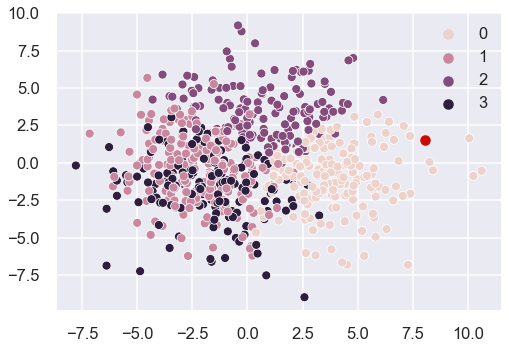

In [83]:
# Plotting that characteristic from above in a different color, to better visualize the cluster groups
sns.set_context("talk")
sns.scatterplot(pc1, pc2, hue=kmeans.labels_)
plt.scatter(x, y, color='r')
sns.set_style('darkgrid')

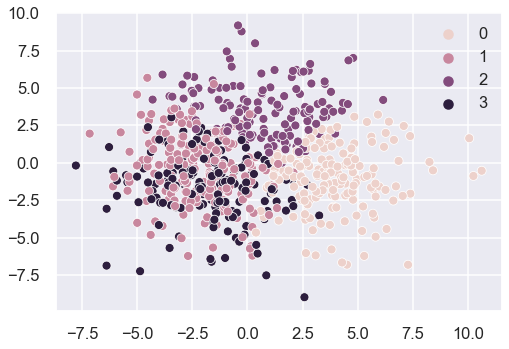

In [84]:
# Plotting the PCA results with the kmeans labels
sns.set_context("talk")
sns.scatterplot(pc1, pc2, hue=kmeans.labels_)
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Predicted')

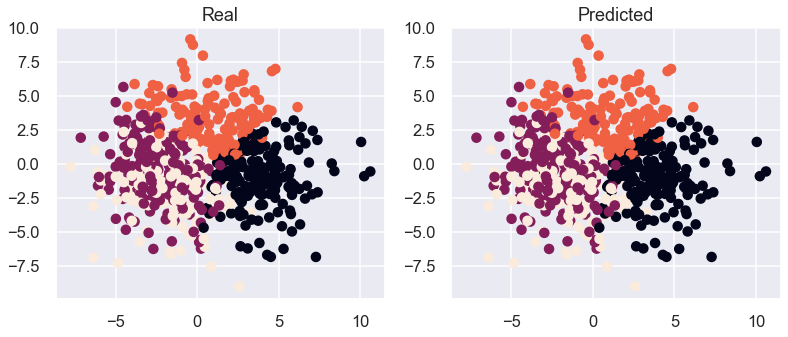

In [85]:
# Plotting two scatter plots, with kmeans labels and kmeans predicted
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].scatter(pc1, pc2, c=kmeans.labels_)
ax[1].scatter(pc1, pc2, c=predicted )

ax[0].set_title('Real')
ax[1].set_title('Predicted')

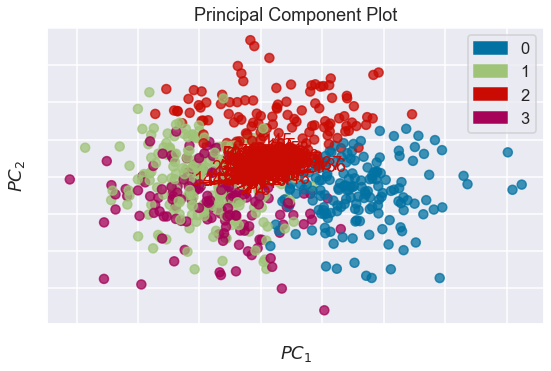

In [86]:
# Running YellowBrick visualizer to check the clusters
visualizer = PCADecomposition(scale=True, proj_features=True,)
components = visualizer.fit_transform(young_scale, kmeans.labels_)
    
visualizer.show()
                                      
                                      


In [87]:
# running DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(young_scale)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [88]:
# Storing DBSCAN in a variable
labels = DBSCAN(eps=0.3, min_samples=10).fit_predict(young_scale)

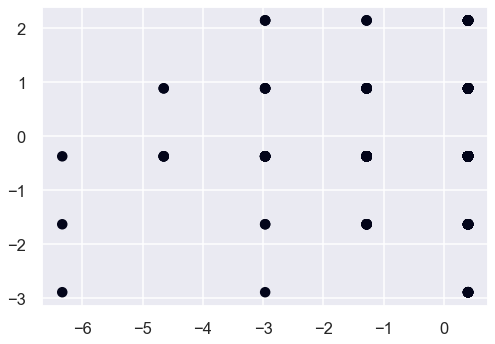

In [90]:
# Plotting the DBSCAN
plt.scatter(young_scale[:, 0], young_scale[:, 1], c=labels);

In [91]:
# Adding a cluster column to the original DataSet
young['cluster'] = kmeans.labels_

In [92]:
# Grouping the original DataSet by the new Cluster column, calculating the mean of each column to check the clustering
young.groupby('cluster').mean()

Music  Slow songs or fast songs     Dance      Folk   Country  \
cluster                                                                     
0        4.592814                  3.485030  2.958084  1.760479  1.976048   
1        4.886256                  3.293839  3.563981  2.080569  1.805687   
2        4.817518                  3.277372  3.189781  2.839416  2.708029   
3        4.729560                  3.113208  2.465409  2.540881  2.169811   

         Classical music   Musical       Pop      Rock  Metal or Hardrock  \
cluster                                                                     
0               2.461078  1.976048  3.179641  3.736527           2.646707   
1               2.483412  3.028436  4.014218  3.473934           1.682464   
2               3.773723  3.189781  3.299270  4.116788           3.021898   
3               3.509434  2.855346  3.119497  3.974843           2.364780   

         ...  Shopping centres  Branded clothing  Entertainment spending  \
cluster  ...                                                               
0        ...          2.886228          3.377246                3.562874   
1        ...          4.018957          3.213270                3.303318   
2        ...          3.014599          2.985401                3.306569   
3        ...          2.849057          2.446541                2.553459   

         Spending on looks  Spending on gadgets  Spending on healthy eating  \
cluster                                                                       
0                 3.023952             3.437126                    3.347305   
1                 3.734597             2.720379                    3.644550   
2                 2.824818             3.167883                    3.810219   
3                 2.559748             2.132075                    3.264151   

               Age      Height     Weight  Number of siblings  
cluster                                                        
0        20.179641  181.317365  76.886228            1.281437  
1        19.971564  168.146919  58.194313            1.194313  
2        21.335766  177.109489  71.766423            1.467153  
3        20.194969  168.943396  60.452830            1.314465  

[4 rows x 139 columns]